<h2 style='text-align:center;font-size:80px;background-color:black;border:80px;color:orange'>  Japan Used Car Report
 . <h2>

# `Problem Statement:-`

## Japan Used Cars Price by using `LinearRegression`

## Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in dataset.

## `Target Column` is Price 

# Lets import some libraries and dataset

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [112]:
df= pd.read_csv('Japan_used_cars_datasets.csv')

In [113]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


## Now lets shuffel the dataset and see whether it has any abnormal data's present or not 

In [114]:
df.tail()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline
2317,2335,1400,toyota,estima t,2005,72320,3000,at,2wd,rhd,gasoline


In [115]:
df.sample(10)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
485,489,728,mitsubishi,pajero io,2003,80276,2000,at,4wd,rhd,gasoline
1959,1975,1300,honda,insight,2009,136000,1300,at,2wd,rhd,gasoline
2193,2209,1360,honda,fit,2008,109000,1400,at,2wd,rhd,gasoline
1603,1619,1170,toyota,sienta,2005,130000,1500,at,2wd,rhd,gasoline
517,521,750,mazda,demio,2011,126800,1300,at,2wd,rhd,gasoline
996,1006,940,nissan,serena,2008,157000,1990,at,2wd,rhd,gasoline
1633,1649,1185,honda,acty truck,1996,63940,660,mt,4wd,rhd,gasoline
200,204,530,nissan,cube,2012,125000,1500,at,2wd,rhd,gasoline
698,706,808,toyota,ractis,2007,55000,1500,at,2wd,rhd,gasoline
195,197,500,suzuki,alto,2004,70000,660,at,2wd,rhd,gasoline


## we cannot see any abnormal and NaN values present in dataset.. we will check later also


In [116]:
df.shape

(2318, 11)

In [117]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

## Here there are 2318 rows and 11 column including target in dataset

In [118]:
## Now lets identify data type they belong too

df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

## My `Target` column is int64 which makes it `Regression` problem and rest column have both int64 and object

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> EDA <h2>

In [119]:
### Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


### Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset .... Here we can see that all the columns counts are equal which means that there is no Missing values present

# Now lets check Null Values

In [120]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

## No Null Values are present in dataset

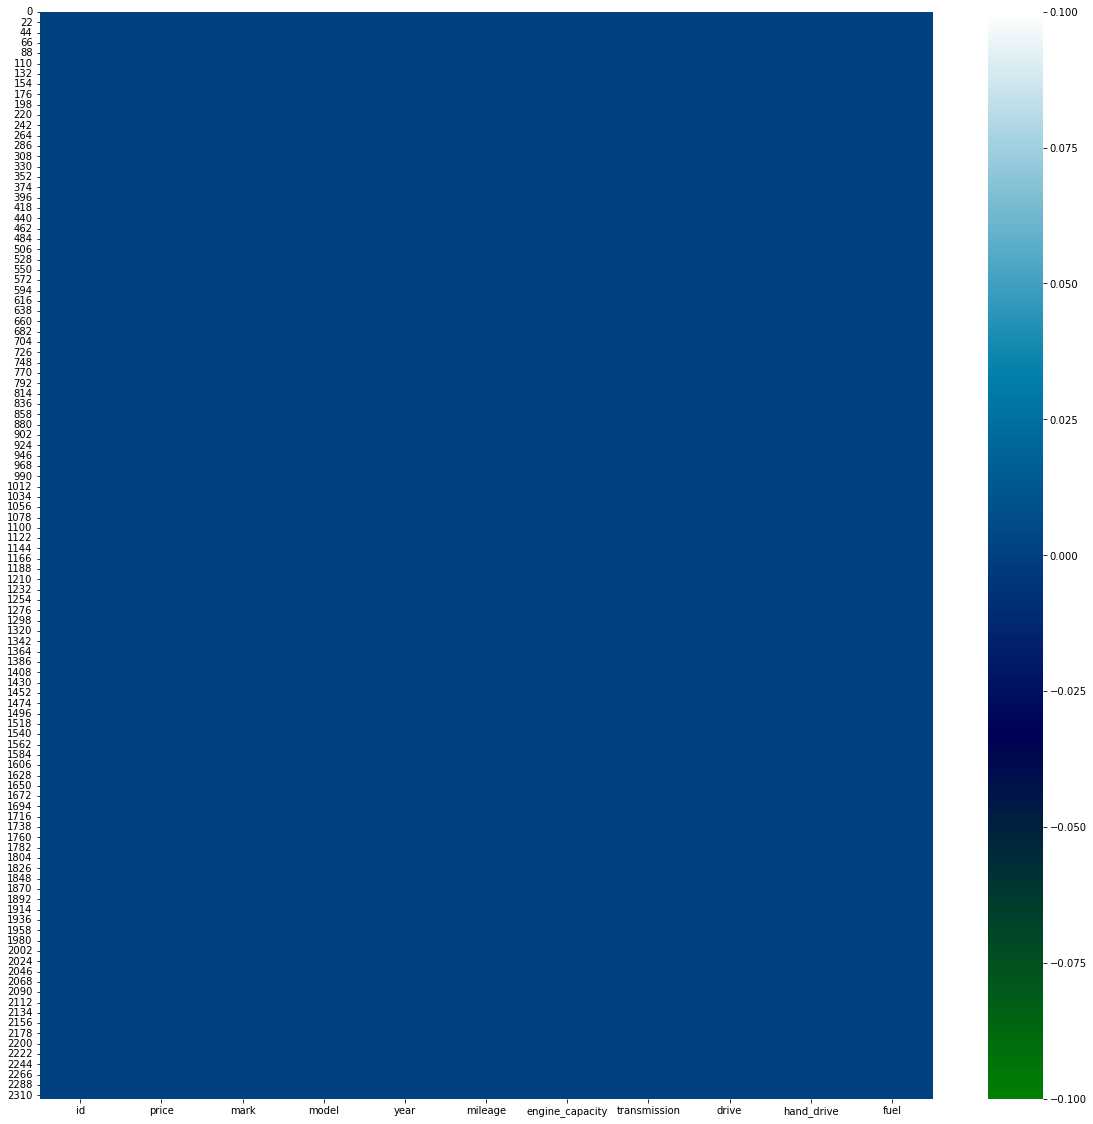

In [121]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

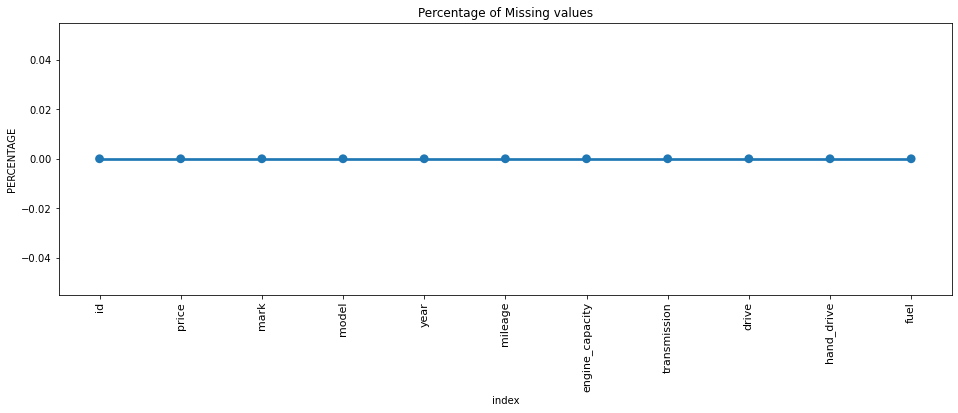

In [122]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## and from graph also it is clear that there is no NaN values

In [123]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

0       1
1609    1
1557    1
1558    1
1559    1
       ..
781     1
782     1
783     1
784     1
2335    1
Name: id, Length: 2318, dtype: int64



****************************************************************************************************
850     71
790     58
1306    57
1120    56
1220    45
        ..
1121     1
1122     1
1123     1
1127     1
80       1
Name: price, Length: 354, dtype: int64



****************************************************************************************************
toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
g

### Here we can see value count of each column and i cannot find any abnormal data in dataset

In [124]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
id,2318
price,354
mark,28
model,258
year,30
mileage,1367
engine_capacity,93
transmission,3
drive,3
hand_drive,3


In [125]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)

Categorical columns are:
 ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']


In [126]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Numerical columns are:
 ['id', 'price', 'year', 'mileage', 'engine_capacity']


### These are numeriacal and categorical column

In [127]:
# Checking wheather the target vaiable contains any space
df.loc[df['price']==" "]

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel


## No space is present in dataset

In [128]:
df.shape

(2318, 11)

In [129]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [130]:
df.shape

(2318, 11)

## There was no duplicate values

-------

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:white'>A. Univariate Analysis <h2>

In [131]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [132]:
def generate_pie(i):
    plt.figure(figsize=(10,5),facecolor='orange')
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

In [133]:
cols1=['transmission','drive','hand_drive','fuel']

Pie plot for the column: transmission


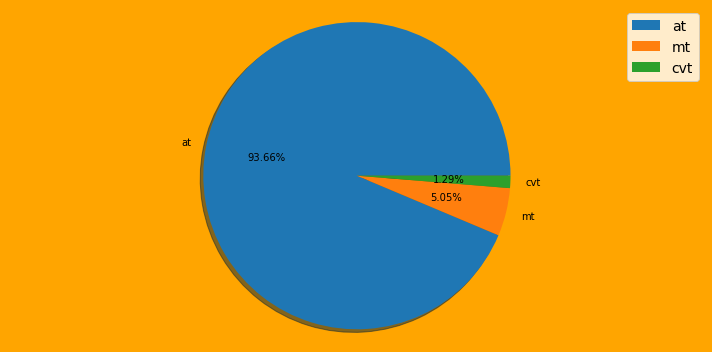

Pie plot for the column: drive


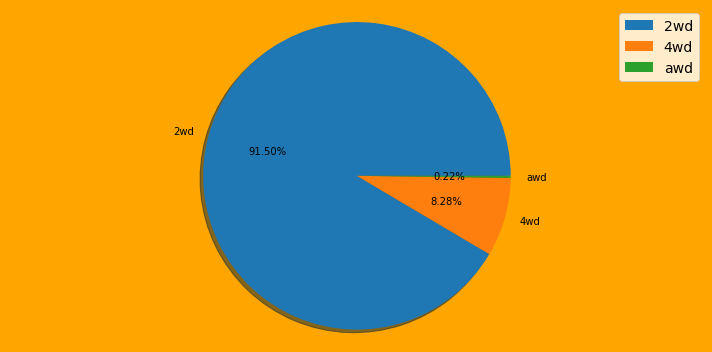

Pie plot for the column: hand_drive


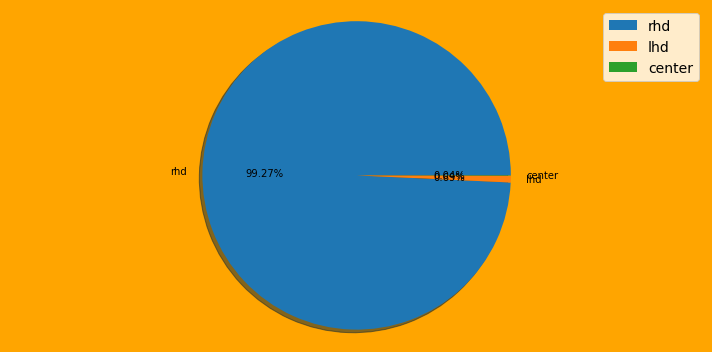

Pie plot for the column: fuel


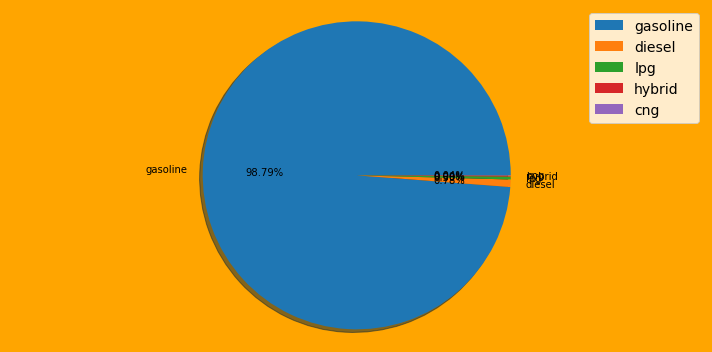

In [134]:
plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

## Observation

- we can see that majority of people are preferning at car which is 93.66% and rest are all others which is mt cvt
- we can see that majority of people are prefering 2wd which is 91.50% and 8.28% people are prefering 4wd and rest is awd.
- we can see that majority of people are prefering rhd which is 99.27% and rest are all others which is lhd and center.
- we can see that majority of people are prefering gasoline which is 98.79% and rest are all others which is diesel,lpg,hybrid,cng

engine capicity:  1507.0107851596204


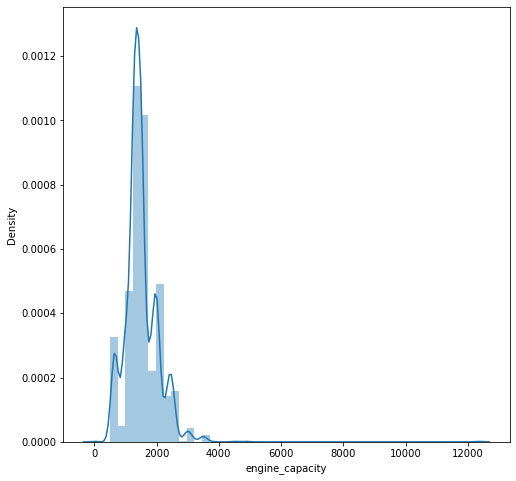

In [135]:
plt.figure(figsize=(8,8))
sns.distplot(df['engine_capacity'])

print('engine capicity: ',df['engine_capacity'].mean())

### Maximum car sold at engine_capicity of 1507.01

<h2 style='text-align:center;font-size:50px;background-color:black;border:40px;color:yellow'> B. Bivariate Analysis <h2>

In [136]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

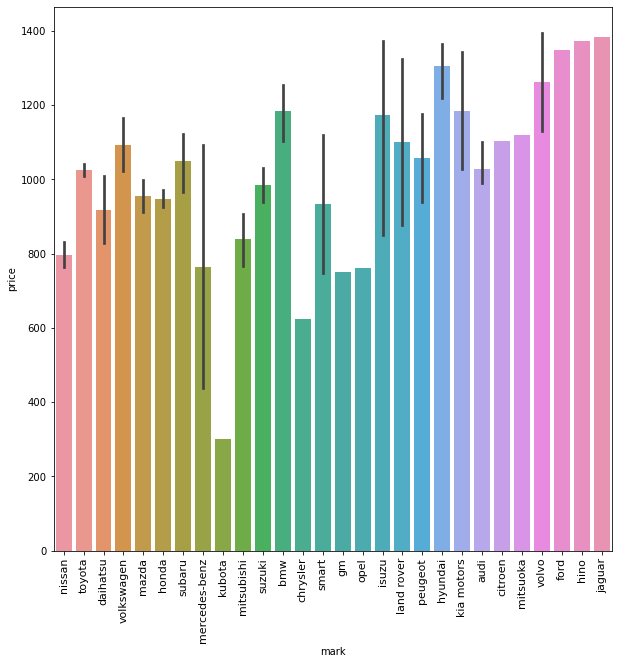

In [137]:
plt.figure(figsize=(10,10))
sns.barplot(x='mark', y='price',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

## Through this graph we can see that `jaguar` is the `costliest` and `kubota` is `cheapest` car..

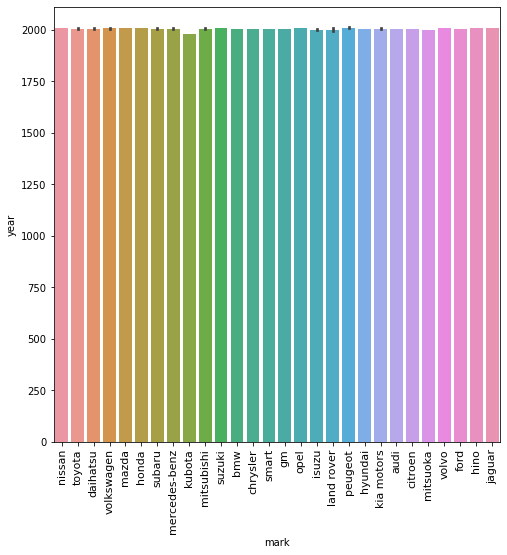

In [138]:
plt.figure(figsize=(8,8))
sns.barplot(x='mark', y='year',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

## Sales of all cars are nearly equal

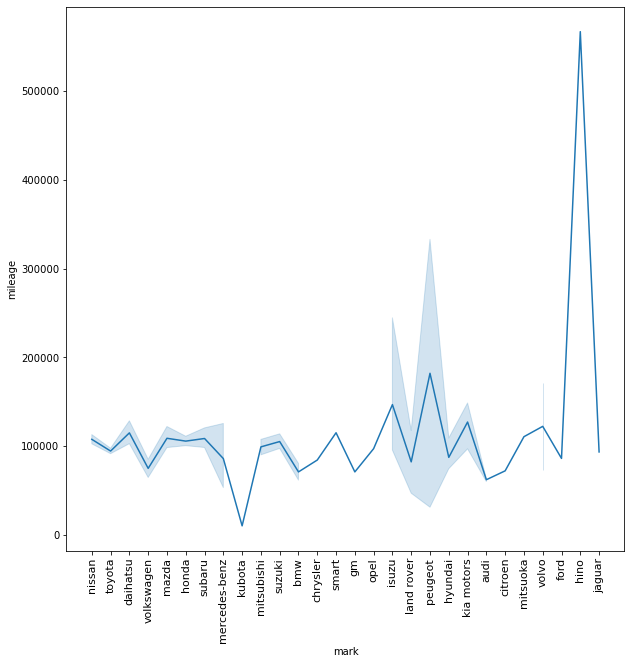

In [139]:
plt.figure(figsize=(10,10))
sns.lineplot(x='mark', y='mileage',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### higest mileage is of `hino` and lowest mileage is of kubota

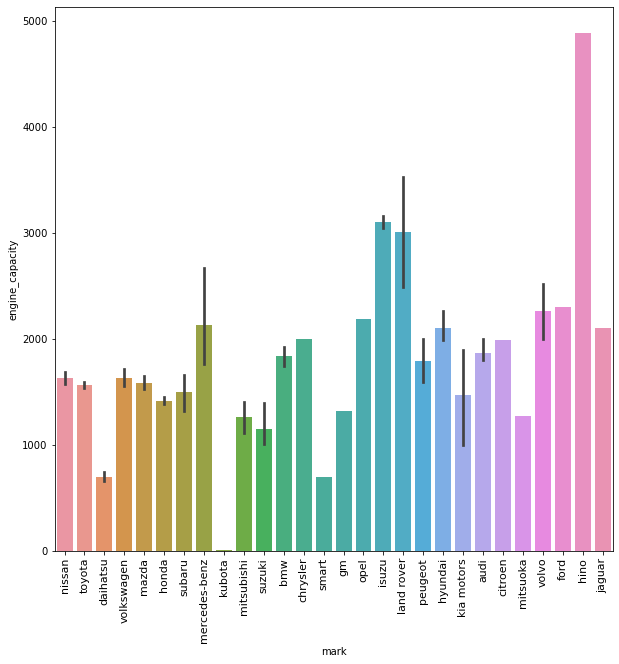

In [140]:
plt.figure(figsize=(10,10))
sns.barplot(x='mark', y='engine_capacity',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### Highest engine_ capicity is of `Hino` and lowest engine_capicity is of `kubota`

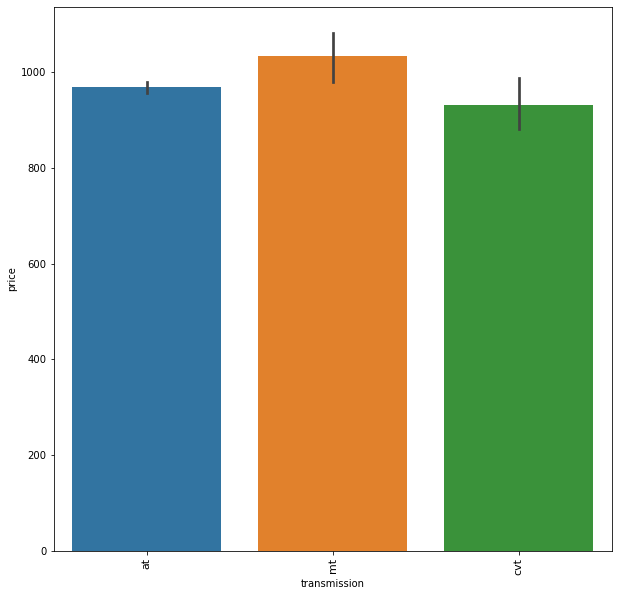

In [141]:
plt.figure(figsize=(10,10))
sns.barplot(x='transmission', y='price',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### mt is the most expensive car and cvt is cheapest in all

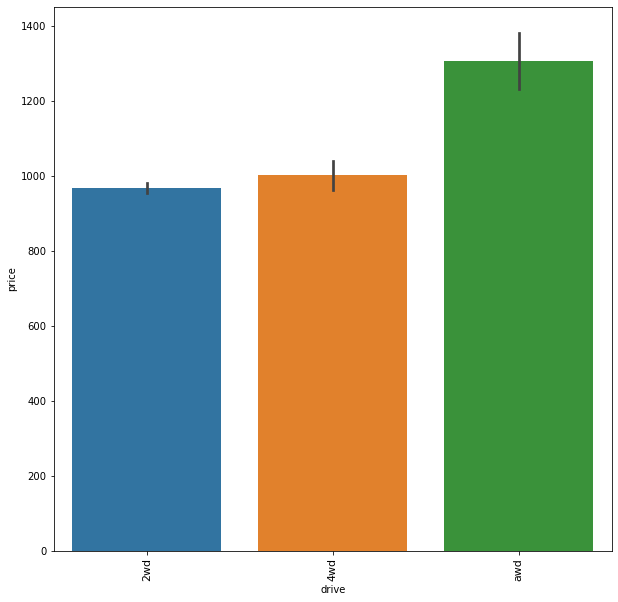

In [142]:
plt.figure(figsize=(10,10))
sns.barplot(x='drive', y='price',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### awd car is most expensive in all and 2wd car is cheapest in all

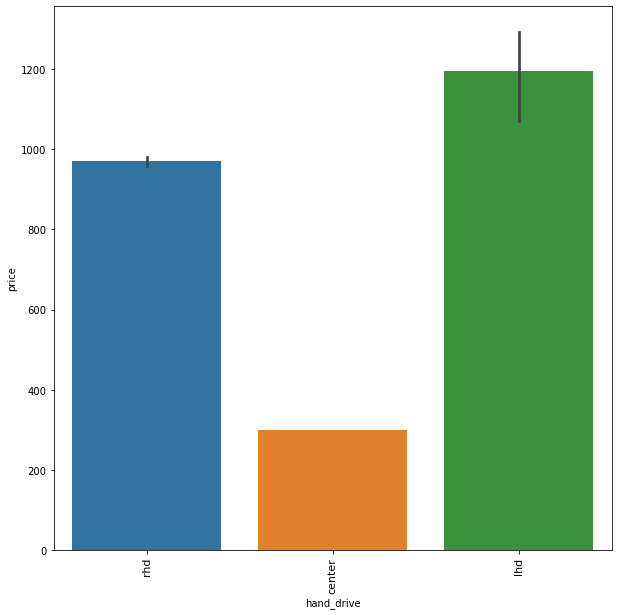

In [143]:
plt.figure(figsize=(10,10))
sns.barplot(x='hand_drive', y='price',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### lhd car is the most expensive and center car is cheapest in all

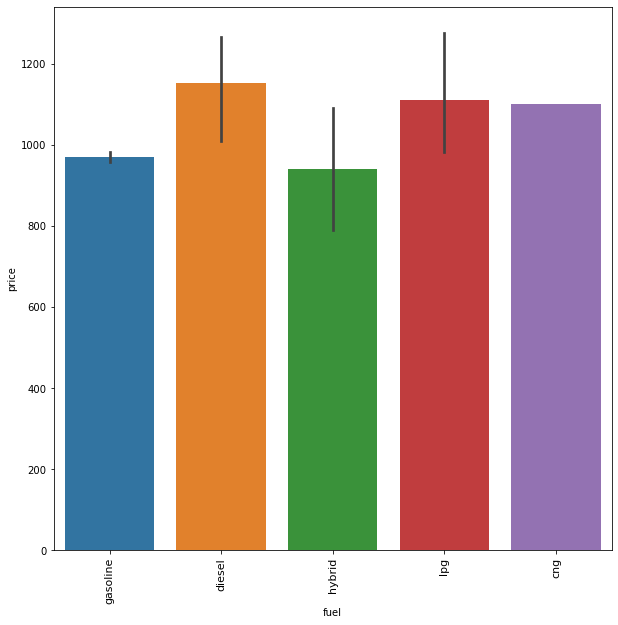

In [144]:
plt.figure(figsize=(10,10))
sns.barplot(x='fuel', y='price',data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### diesel car is most expensive and hybrid car is cheapest in all

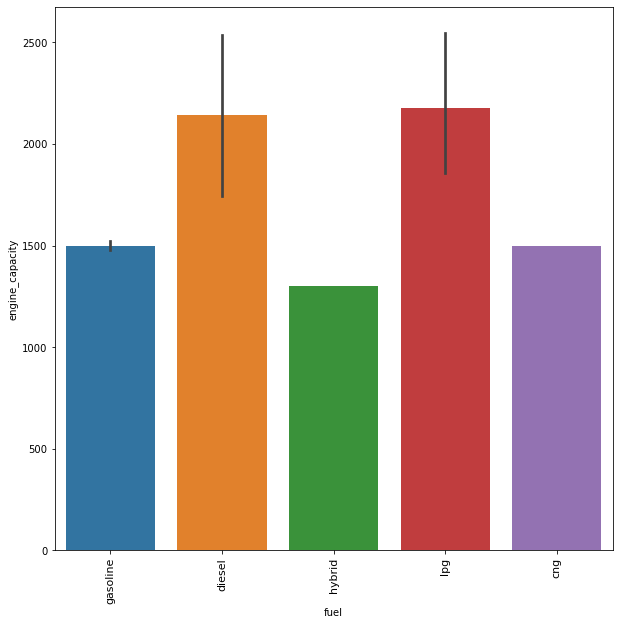

In [145]:
plt.figure(figsize=(10,10))
sns.barplot(x='fuel', y='engine_capacity', data=df)
plt.xticks(rotation=90,fontsize=11)
plt.show()

### Above 2000 enine_capacity diesel and lpg is used and the least used fuel is hybrid

<h2 style='text-align:center;font-size:50px;background-color:black;border:40px;color:yellow'> B. Multivariate Analysis <h2>

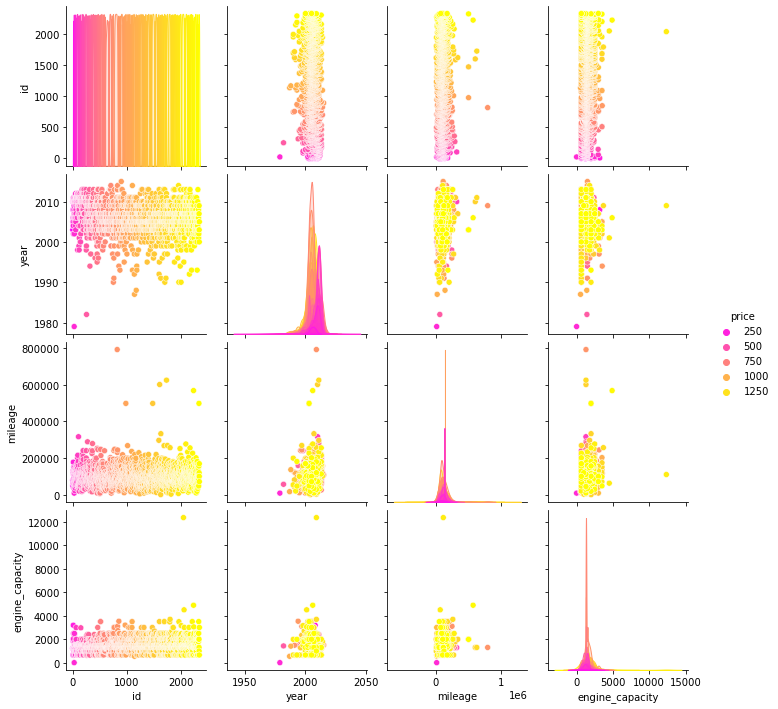

In [146]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="price",palette="spring")

### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "charges". Here we can observe the relation between the features and label

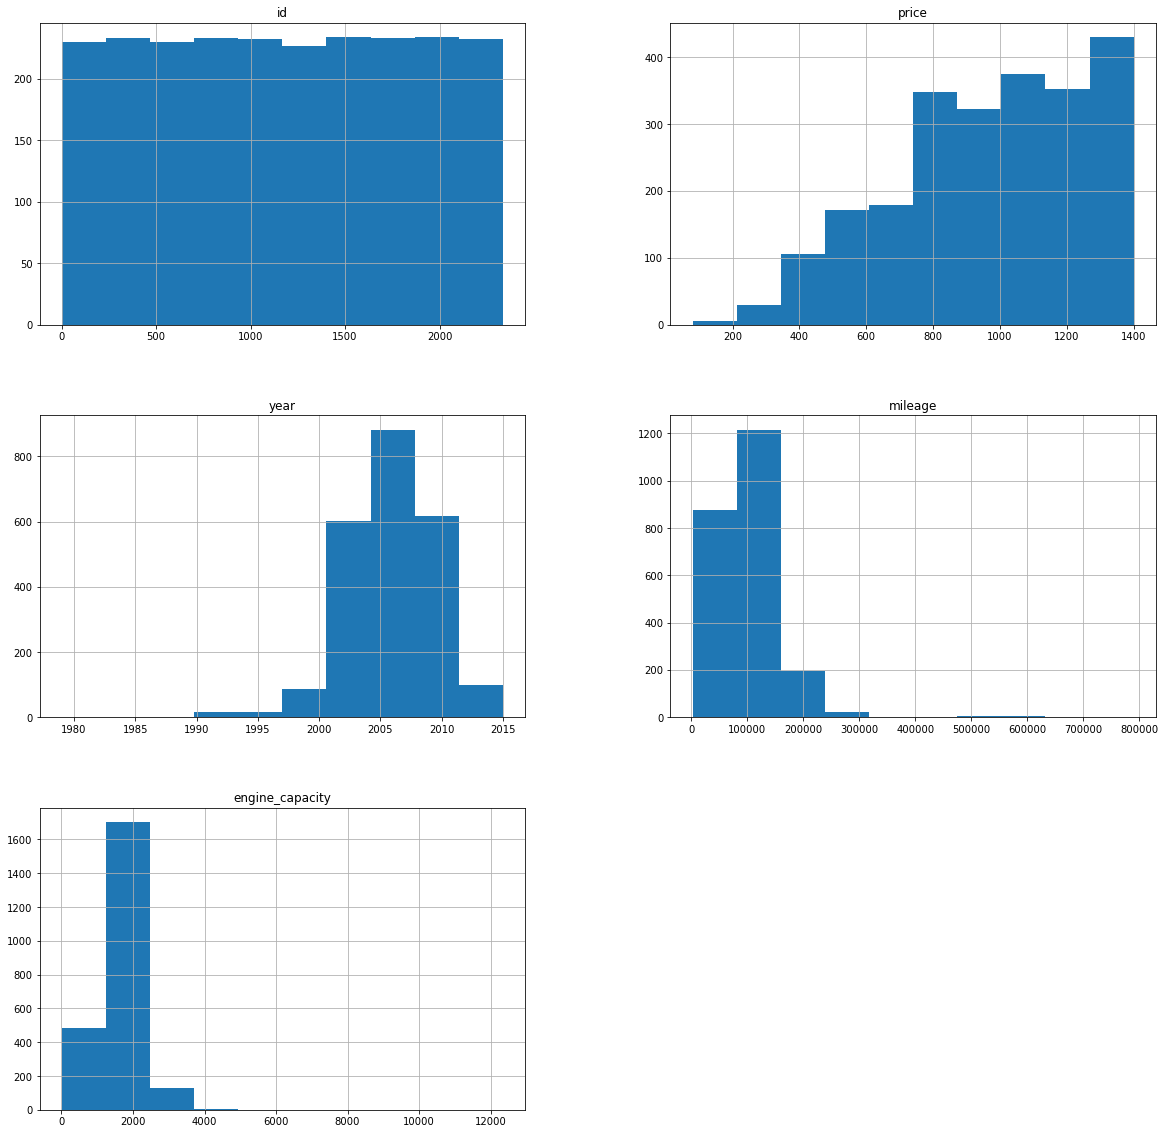

In [147]:
df.hist(bins=10, figsize=(20,20))
plt.show()

### Some columns have skewness which we will remove later

id                    AxesSubplot(0.125,0.749828;0.133621x0.130172)
price              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
year                AxesSubplot(0.44569,0.749828;0.133621x0.130172)
mileage            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
engine_capacity    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

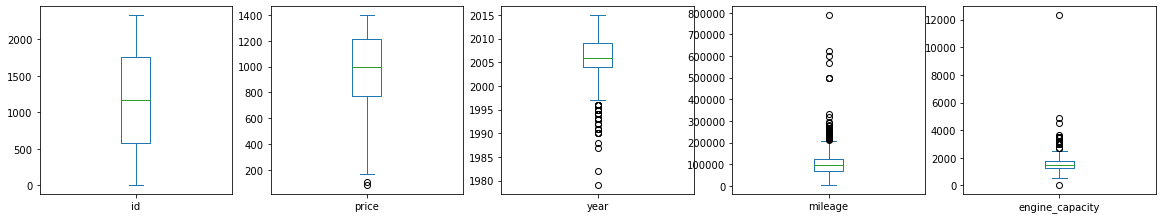

In [148]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

### We can see that year, mileage, engine_capacity have outliers

<h2 style='text-align:center;font-size:50px;background-color:black;border:40px;color:white'> CORRELATION <h2>

### Before doing correlation lets convert all catagorical columns into int format by Encoding technique

In [149]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()

Input = ['mark','model','transmission','drive','hand_drive','fuel']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [152]:
df.dtypes

id                 int64
price              int64
mark               int32
model              int32
year               int64
mileage            int64
engine_capacity    int64
transmission       int32
drive              int32
hand_drive         int32
fuel               int32
dtype: object

## we can all categorical column has converted to int column

In [153]:
df.corr()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
id,1.000000,0.985100,0.089661,-0.047147,-0.188326,0.028091,0.169773,0.041417,0.046394,-0.047754,-0.021589
price,0.985100,1.000000,0.090245,-0.041376,-0.211092,0.021581,0.173748,0.043679,0.046591,-0.036473,-0.016337
mark,0.089661,0.090245,1.000000,0.314685,-0.021472,-0.077914,0.093752,-0.055845,-0.038483,0.085887,0.039038
model,-0.047147,-0.041376,0.314685,1.000000,0.107715,-0.050820,-0.125296,-0.041309,0.005332,-0.029706,-0.089103
year,-0.188326,-0.211092,-0.021472,0.107715,1.000000,0.086065,-0.142460,-0.328114,-0.241064,0.107760,0.007703
mileage,0.028091,0.021581,-0.077914,-0.050820,0.086065,1.000000,0.130362,0.042584,0.116351,-0.001168,0.078913
engine_capacity,0.169773,0.173748,0.093752,-0.125296,-0.142460,0.130362,1.000000,-0.146307,0.055608,-0.039517,-0.013111
transmission,0.041417,0.043679,-0.055845,-0.041309,-0.328114,0.042584,-0.146307,1.000000,0.248651,-0.040974,-0.074013
drive,0.046394,0.046591,-0.038483,0.005332,-0.241064,0.116351,0.055608,0.248651,1.000000,-0.023037,-0.036320
hand_drive,-0.047754,-0.036473,0.085887,-0.029706,0.107760,-0.001168,-0.039517,-0.040974,-0.023037,1.000000,0.434709


In [154]:
df.corr()['price'].sort_values()

year              -0.211092
model             -0.041376
hand_drive        -0.036473
fuel              -0.016337
mileage            0.021581
transmission       0.043679
drive              0.046591
mark               0.090245
engine_capacity    0.173748
id                 0.985100
price              1.000000
Name: price, dtype: float64

### This is correlation of features with target

In [155]:
df.drop("id",axis=1,inplace= True)

## As id is of no use so we are removing id

In [156]:
df.drop("model",axis=1,inplace= True)
# These are irrelevent of making algorithm
#We can see that reference over here in the link 
# https://www.cashcarsbuyer.com/considerations-for-buying-a-used-car/#:~:text=Considerations%20for%20Buying%20a%20Used%20Car%3A%20What%20are,do%20a%20test%20drive%20...%207%20Insurance%20

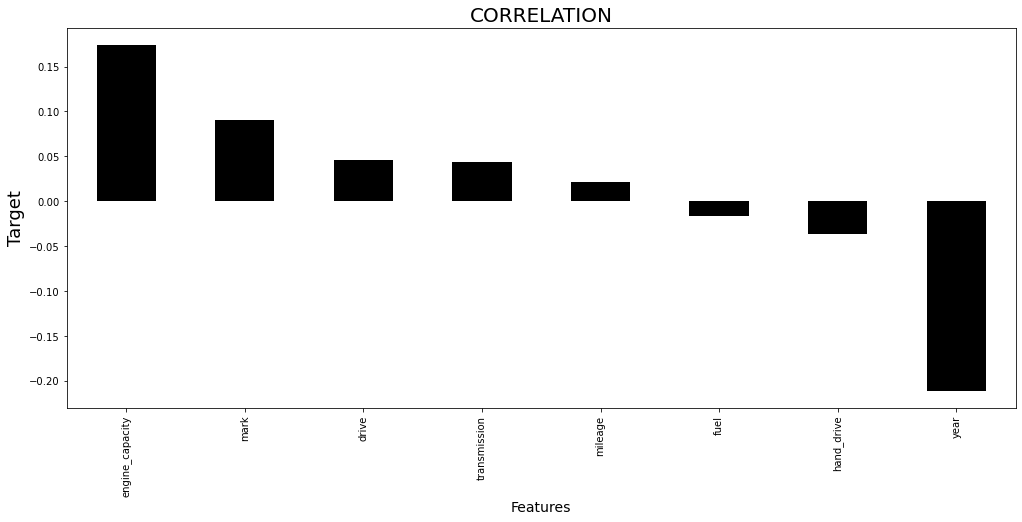

In [157]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

### We can see thst some column are positively correlated and some are negetively correlated

<h2 style='text-align:center;font-size:50px;background-color:white;border:40px;color:black'> DESCRIPTIVE STATISTICS <h2>

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2318.0,971.522433,288.673112,80.0,776.0,1000.0,1213.0,1400.0
mark,2318.0,19.411993,7.132919,0.0,15.0,24.0,25.0,27.0
year,2318.0,2005.972390,3.698863,1979.0,2004.0,2006.0,2009.0,2015.0
mileage,2318.0,100013.194996,52512.478883,2000.0,67000.0,94000.0,124000.0,790000.0
engine_capacity,2318.0,1507.010785,549.585170,9.0,1300.0,1490.0,1800.0,12340.0
transmission,2318.0,0.113891,0.449395,0.0,0.0,0.0,0.0,2.0
drive,2318.0,0.087144,0.289655,0.0,0.0,0.0,0.0,2.0
hand_drive,2318.0,1.992235,0.092583,0.0,2.0,2.0,2.0,2.0
fuel,2318.0,1.998274,0.149799,0.0,2.0,2.0,2.0,4.0


## We can see that there is no missing value but there is outliers and skewness present which we will check further

<AxesSubplot:>

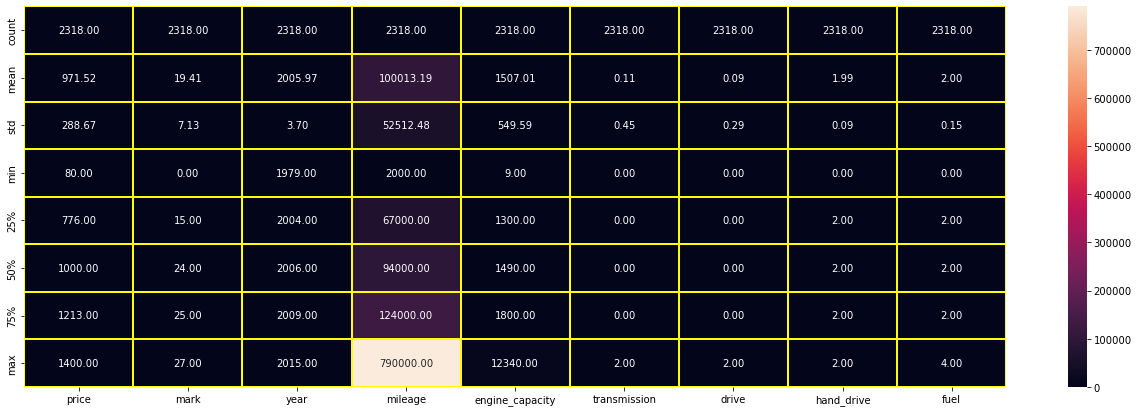

In [159]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:pink'> Lets Check Skewness <h2>


In [160]:
df.skew()

price              -0.466780
mark               -0.947938
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
transmission        3.820441
drive               3.193137
hand_drive        -12.811470
fuel                4.146744
dtype: float64

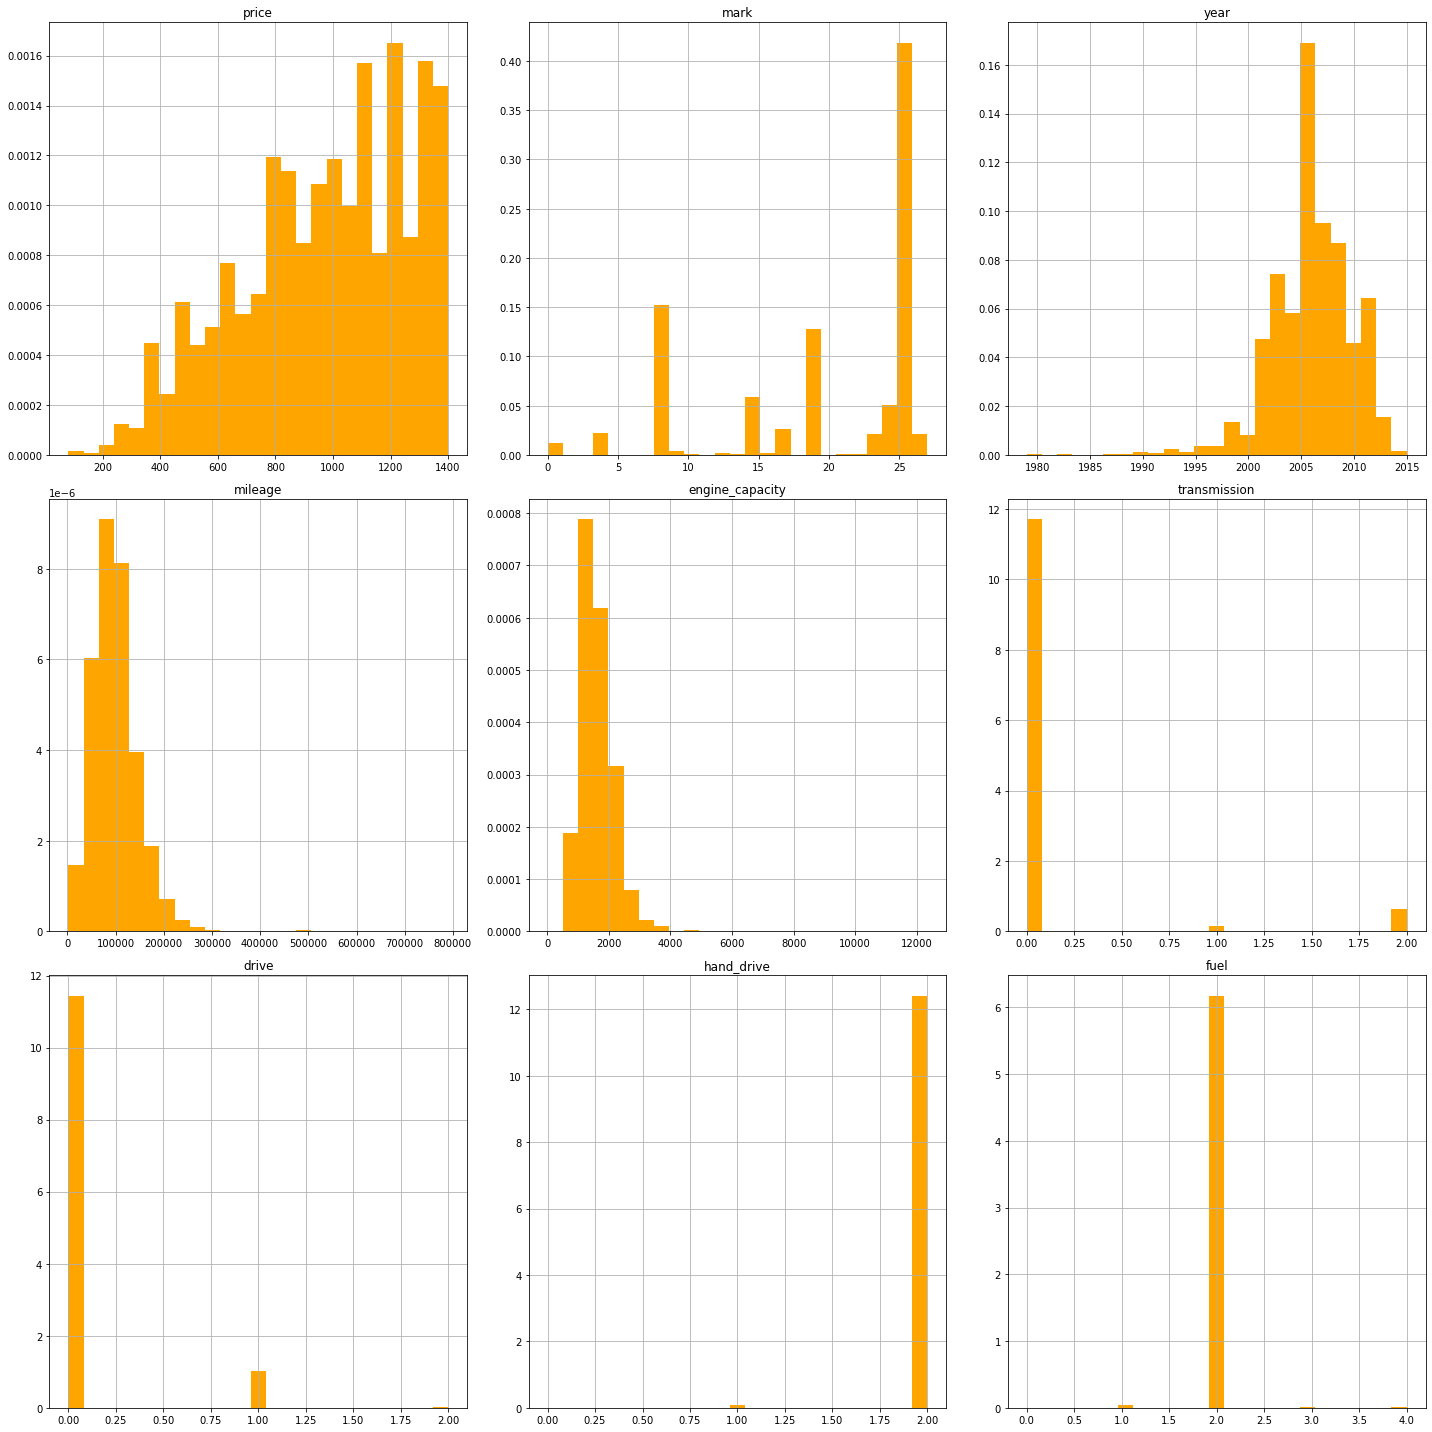

In [161]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:green'> Now Lets Remove Outliers Now <h2>

In [162]:
from scipy.stats import zscore

In [163]:
# Features containing outliers

features=df[['mileage','engine_capacity']]


In [164]:
z=np.abs(zscore(features))

z

,mileage,engine_capacity
0,0.381195,0.485945
1,0.895470,0.558743
2,0.996610,0.897214
3,0.583755,0.879015
4,0.642142,1.541515
...,...,...
2313,0.399740,0.930012
2314,0.018796,2.717161
2315,0.018796,1.541515
2316,1.333053,1.541515


In [165]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new


,price,mark,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,19,2003,80000,1240,0,0,2,2
1,110,19,2010,53000,1200,0,0,2,2
2,165,19,2005,47690,2000,0,0,2,2
3,190,25,2008,130661,1990,0,0,2,2
4,190,4,2006,66300,660,0,0,2,2
...,...,...,...,...,...,...,...,...,...
2313,1400,25,2009,121000,996,0,0,2,2
2314,1400,25,2003,101000,3000,0,0,2,2
2315,1400,23,2005,101000,660,1,0,2,2
2316,1400,8,2000,170000,660,0,1,2,2


In [166]:
df_new.shape

(2285, 9)

In [167]:
df.shape

(2318, 9)

In [168]:
# Data Loss

dataloss=((2318-2285)/2318)*100
dataloss

1.4236410698878343

## 1.4% data loss by zscore

# IQR Method

In [169]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [170]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (2318, 9)

New DataFrame data in Rows and Column: (1931, 9)

Total Dropped rows: 387


In [171]:
# Precentag eof data loss

dataloss_1=((2318-1931)/2318)*100
dataloss_1

16.695427092320966

## 16% dataloss by IQR Method

### so here we will go for zscore because it has less data loss as compared to IQR

<h2 style='text-align:center;font-size:40px;background-color:purple;border:30px;color:white'> * Lets Remove Skewness Now* <h2>

In [172]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [173]:
#Removing skewness using yeo-johnson
df_new[['mileage','engine_capacity']] = PT.fit_transform(df_new[['mileage','engine_capacity']].values)

In [174]:
L1=['mileage','engine_capacity']

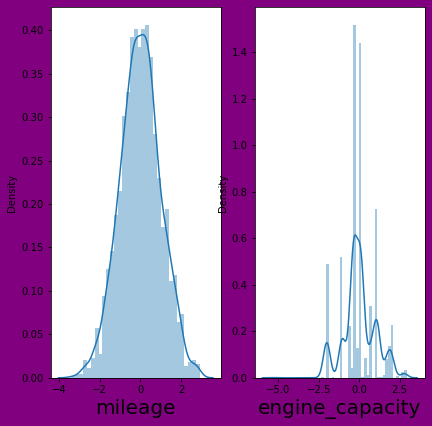

In [175]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(25,15), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Now we can see all features have been normalized and skewness have been removed

# Now lets split dataset into dependent and independent varaible

In [176]:
df.head()

,price,mark,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,19,2003,80000,1240,0,0,2,2
1,110,19,2010,53000,1200,0,0,2,2
2,165,19,2005,47690,2000,0,0,2,2
3,190,25,2008,130661,1990,0,0,2,2
4,190,4,2006,66300,660,0,0,2,2


In [177]:
x=df_new.loc [:,df_new.columns != 'price']
# Independent Variable

In [178]:
y=df_new.loc[:,'price']
#Dependent Variable

In [179]:
x

,mark,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,19,2003,-0.314541,-0.473142,0,0,2,2
1,19,2010,-1.042389,-0.566299,0,0,2,2
2,19,2005,-1.203455,1.092898,0,0,2,2
3,25,2008,0.803676,1.074264,0,0,2,2
4,4,2006,-0.667505,-2.002128,0,0,2,2
...,...,...,...,...,...,...,...,...
2313,25,2009,0.607627,-1.065094,0,0,2,2
2314,25,2003,0.178519,2.782613,0,0,2,2
2315,23,2005,0.178519,-2.002128,1,0,2,2
2316,8,2000,1.543273,-2.002128,0,1,2,2


In [180]:
y

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2285, dtype: int64

In [181]:
x.shape

(2285, 8)

In [182]:
y.shape


(2285,)

# Now lets scale the data

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,mark,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,-0.062166,-0.809280,-0.314541,-0.473142,-0.252511,-0.298103,0.081861,0.027159
1,-0.062166,1.088174,-1.042389,-0.566299,-0.252511,-0.298103,0.081861,0.027159
2,-0.062166,-0.267150,-1.203455,1.092898,-0.252511,-0.298103,0.081861,0.027159
3,0.778366,0.546044,0.803676,1.074264,-0.252511,-0.298103,0.081861,0.027159
4,-2.163497,0.003915,-0.667505,-2.002128,-0.252511,-0.298103,0.081861,0.027159
...,...,...,...,...,...,...,...,...
2280,0.778366,0.817109,0.607627,-1.065094,-0.252511,-0.298103,0.081861,0.027159
2281,0.778366,-0.809280,0.178519,2.782613,-0.252511,-0.298103,0.081861,0.027159
2282,0.498189,-0.267150,0.178519,-2.002128,1.983877,-0.298103,0.081861,0.027159
2283,-1.603142,-1.622474,1.543273,-2.002128,-0.252511,3.177231,0.081861,0.027159


# Lets ckeck Multicollinearity factor through VIF

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [187]:
vif_cal()

   VIF FACTOR         FEATURES
0    1.034171             mark
1    1.256205             year
2    1.068463          mileage
3    1.130569  engine_capacity
4    1.268579     transmission
5    1.135461            drive
6    1.336913       hand_drive
7    1.315250             fuel


## Here no column have multicollinearity as every column vif is less than 10 which means there is no multicollinearity... now lets build our model

# Model Training and Testing

In [188]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [189]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.07152303518988201
At random state 0,the testing accuracy is :- 0.06379505358555082



At random state 1,the training accuracy is :- 0.0691430433093122
At random state 1,the testing accuracy is :- 0.06674242128376762



At random state 2,the training accuracy is :- 0.05661870952865611
At random state 2,the testing accuracy is :- 0.11095376496533171



At random state 3,the training accuracy is :- 0.07358895790175346
At random state 3,the testing accuracy is :- 0.0579718372174125



At random state 4,the training accuracy is :- 0.0727926460081808
At random state 4,the testing accuracy is :- 0.06181648235020154



At random state 5,the training accuracy is :- 0.07597794760411591
At random state 5,the testing accuracy is :- 0.04668856717834824



At random state 6,the training accuracy is :- 0.07889635483665702
At random state 6,the testing accuracy is :- 0.0225970632693403



At random state 7,the training accuracy is :- 0.07166707770470582


At random state 78,the training accuracy is :- 0.07583038088433602
At random state 78,the testing accuracy is :- 0.04491969885852232



At random state 79,the training accuracy is :- 0.0703492776739254
At random state 79,the testing accuracy is :- 0.07130361776169825



At random state 80,the training accuracy is :- 0.07359647424191562
At random state 80,the testing accuracy is :- 0.05157372160890461



At random state 81,the training accuracy is :- 0.07969447765102955
At random state 81,the testing accuracy is :- 0.029719434913448972



At random state 82,the training accuracy is :- 0.07531491136199275
At random state 82,the testing accuracy is :- 0.046065382263784205



At random state 83,the training accuracy is :- 0.07683170889809521
At random state 83,the testing accuracy is :- 0.0385367483181982



At random state 84,the training accuracy is :- 0.07686675205534521
At random state 84,the testing accuracy is :- 0.0398568842393171



At random state 85,the training accuracy is :- 0.

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [191]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [192]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [193]:
print (r2_score(y_test,pred_test))

0.07065196281979891


## Cross Validation of Linear Regression Model

In [194]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [195]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- -2349.940781406581
Accuracy_score is :- 7.06519628197989


At cv:- 5
Cross validation score is :- -3511.345442822178
Accuracy_score is :- 7.06519628197989


At cv:- 6
Cross validation score is :- -4711.316337305771
Accuracy_score is :- 7.06519628197989


At cv:- 7
Cross validation score is :- -5526.84046687967
Accuracy_score is :- 7.06519628197989


At cv:- 8
Cross validation score is :- -6100.600740763927
Accuracy_score is :- 7.06519628197989


At cv:- 9
Cross validation score is :- -8166.879128290897
Accuracy_score is :- 7.06519628197989




In [196]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=4).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  -23.499407814065812 
The accuracy_score is: 0.07065196281979891


In [197]:
from sklearn import metrics

In [198]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [199]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 229.5705383769969
mean squared error: 72723.2335127482


In [200]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 269.67245597715055


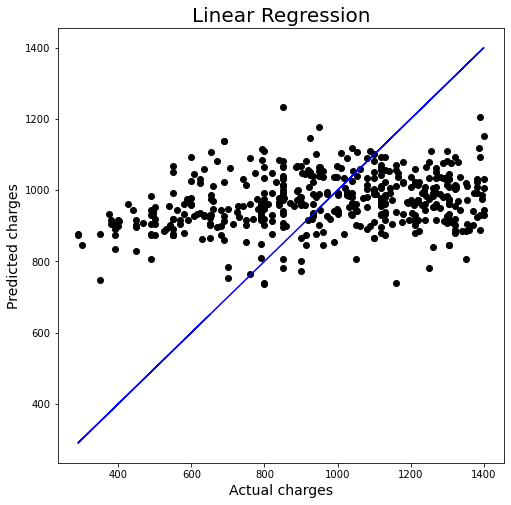

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

## We can see that very less data is on the best fit line and all the data's are scattered

# Regression Algo.

In [202]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: -0.4674672285005621
cv :- -50.46134535325759
MAE: 263.1466083150985
MSE: 114832.07330415754
RMSE: 338.8688142986273


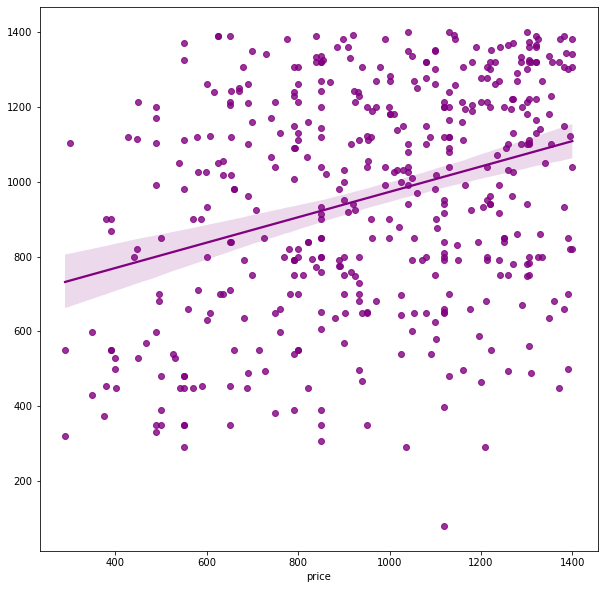

In [203]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
dt=r2_score(y_test,predDTR)
print('R2_Score:',dt)

print('cv :-' ,cross_val_score(DTR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predDTR,color="purple")
plt.show()

R2_Score: 0.08359800590226307
MAE: 211.4840262582057
MSE: 71710.1812691466
RMSE: 267.7875674282632
cv :- -36.75913515735958


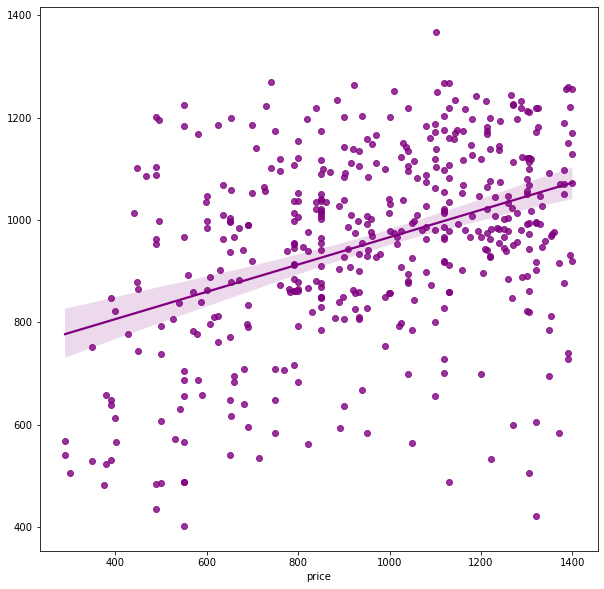

In [204]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

predkn=kn.predict(x_test)
print('R2_Score:',r2_score(y_test,predkn))
print('MAE:',metrics.mean_absolute_error(y_test, predkn))
print('MSE:',metrics.mean_squared_error(y_test, predkn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predkn)))
print('cv :-' ,cross_val_score(kn,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

# Ensemble Technique

R2_Score: 0.19120294132801885
MAE: 207.57327242888402
MSE: 63289.892493549734
RMSE: 251.57482484054268
cv :- -34.07788729776759


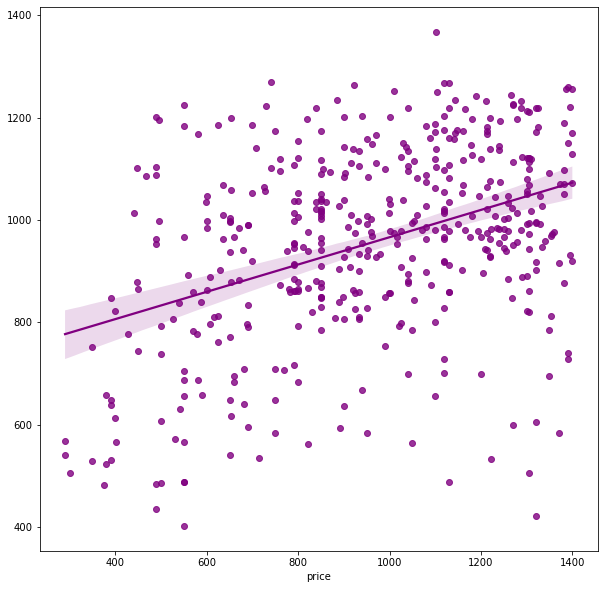

In [205]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('cv :-' ,cross_val_score(RF,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

R2_Score: 0.21797887670776017
MAE: 207.50090876113424
MSE: 61194.625141340744
RMSE: 247.37547400933008
cv :- -32.26993556528398


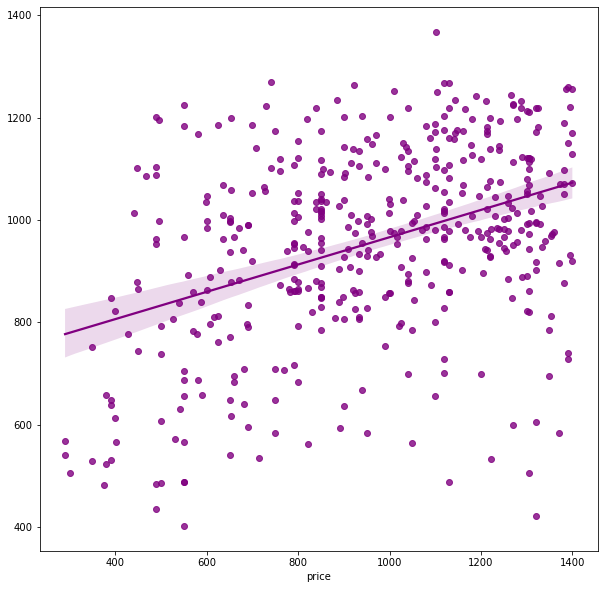

In [206]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

R2_Score: 0.06775790713757368
cv :- -36.259311097533995
MAE: 213.74129102844637
MSE: 72949.69881827135
RMSE: 270.09201916804454


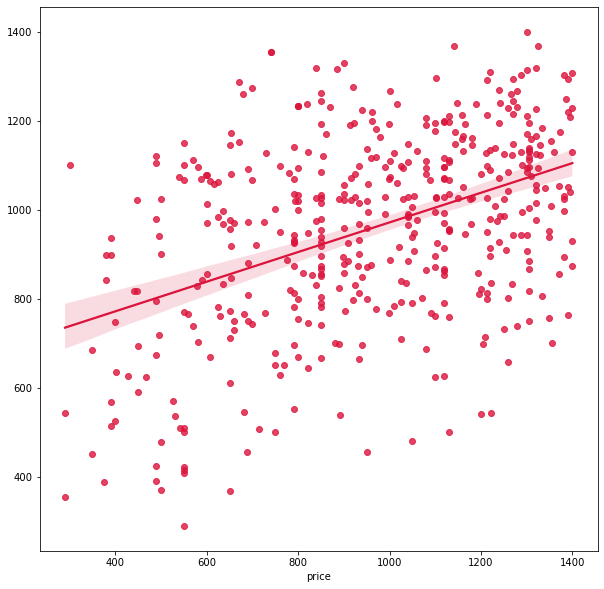

In [207]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
etr=r2_score(y_test,predXT)
print('R2_Score:',etr)

print('cv :-' ,cross_val_score(XT,x,y,cv=5).mean())


# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicted values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predXT,color="crimson")
plt.show()

## none of my models  are performing well and scores are less ..I have tried and everything..Gradient boosting model is performing good from all the model

# Hyper parameter tuning

In [208]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [209]:
#Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}

In [210]:
from sklearn.model_selection import GridSearchCV

In [211]:
gg=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [212]:
gg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [213]:
gg.best_params_

{'criterion': 'squared_error',
 'loss': 'huber',
 'max_features': 'log2',
 'warm_start': True}

In [215]:
gb = GradientBoostingRegressor(criterion='squared_error', warm_start=True, max_features='log2',loss='huber')
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 20.231779433597275


## Now save the model

In [216]:
#Saving the model using .pkl
import joblib
joblib.dump(gb,"jap.pkl")

['jap.pkl']

In [217]:
#Loading the saved model
aa=joblib.load("jap.pkl")

In [218]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([ 938.31536398,  843.93907944,  852.35591033,  932.50015683,
        964.81652769,  562.2211873 , 1120.08574239, 1087.89093997,
        925.31377523,  999.7804367 , 1039.91985048,  993.27502603,
       1121.03442436,  863.50173188,  932.82795088,  976.59993358,
        638.81334772, 1005.25083087, 1087.74235604, 1012.79749858,
        768.71031079, 1145.1038752 , 1121.03442436,  860.40325208,
       1025.88843984, 1060.57570117,  852.35591033, 1056.66874069,
       1344.01369337, 1101.77248943,  966.82727219,  643.33895988,
       1008.56907467, 1091.42340505,  632.66729323,  630.08562221,
       1041.91878702, 1020.63991956, 1121.8608194 ,  839.48716873,
        878.9862033 ,  615.47963371,  883.05207009,  932.78744783,
        848.04447941,  939.8004866 ,  998.74359929, 1114.746813  ,
        712.67270552, 1088.14204347, 1000.35366143,  991.06433316,
        971.70796639, 1111.89483608, 1103.17930108,  671.14092575,
       1062.53438796,  645.72958463, 1141.17004832,  966.82727

In [219]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,454,455,456
Predicted,938.315364,843.939079,852.35591,932.500157,964.816528,562.221187,1120.085742,1087.89094,925.313775,999.780437,...,1092.865543,999.72912,1095.109757,1066.233024,1094.116204,1020.63992,872.136674,952.526096,852.35591,948.112173
Original,650.000000,490.000000,428.00000,1050.000000,840.000000,750.000000,599.000000,800.00000,850.000000,1220.000000,...,690.000000,1160.00000,1269.000000,998.000000,1288.000000,800.00000,625.000000,1030.000000,579.00000,952.000000
